<a href="https://colab.research.google.com/github/JSEFERINO/JHSERIES2/blob/main/13_Series_Tiempo_Cap11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Curso Introductorio Series de Tiempo por Julio Hurtado Márquez**
## **Text: Time Series Forecasting in Python - MARCO PEIXEIRO**
# **Parte 2. Pronósticos con modelos estadísticos**

# **11 Proyecto final: Pronóstico del número de prescripciones de medicamentos antidiabéticos en Australia**
### **Este capítulo cubre**
+ Desarrollo de un modelo de pronóstico para predecir la cantidad de prescripciones de medicamentos antidiabéticos en Australia
+ Aplicación del procedimiento de modelado con un modelo SARIMA

+ Evaluación de nuestro modelo en comparación con una línea base
+ Determinación del modelo campeón

## **Introducción**
+ Hemos cubierto muchos modelos estadísticos para el pronóstico de series temporales.
+ En los capítulos 4 y 5, aprendiste a modelar procesos de promedio móvil y procesos autorregresivos.
+ Luego combinamos estos modelos para formar el modelo ARMA y agregamos un parámetro para pronosticar series temporales no estacionarias, lo que nos llevó al modelo ARIMA.
+ Luego agregamos un componente estacional con el modelo SARIMA.
+ La adición del efecto de las variables exógenas culminó en el modelo SARIMAX.
+ Finalmente, cubrimos la previsión de series temporales multivariadas utilizando el modelo VAR.
+ Por lo tanto, ahora tienes acceso a muchos modelos estadísticos que te permiten pronosticar una amplia variedad de series temporales, desde las más simples hasta las más complejas.
+ Este es un buen momento para consolidar tu aprendizaje y poner en práctica tus conocimientos con un proyecto final.

## **El objetivo del proyecto de este capítulo**
+ El objetivo del proyecto de este capítulo es pronosticar el número de prescripciones de medicamentos antidiabéticos en Australia, desde 1991 hasta 2008.
+ En un entorno profesional, resolver este problema nos permitiría medir la producción de medicamentos antidiabéticos, por ejemplo, para producir lo suficiente para satisfacer la demanda, pero también para evitar la sobreproducción.
+ Los datos que utilizaremos fueron registrados por la Comisión Australiana de Seguros de Salud.
+ Podemos visualizar la serie temporal en la figura 11.1.

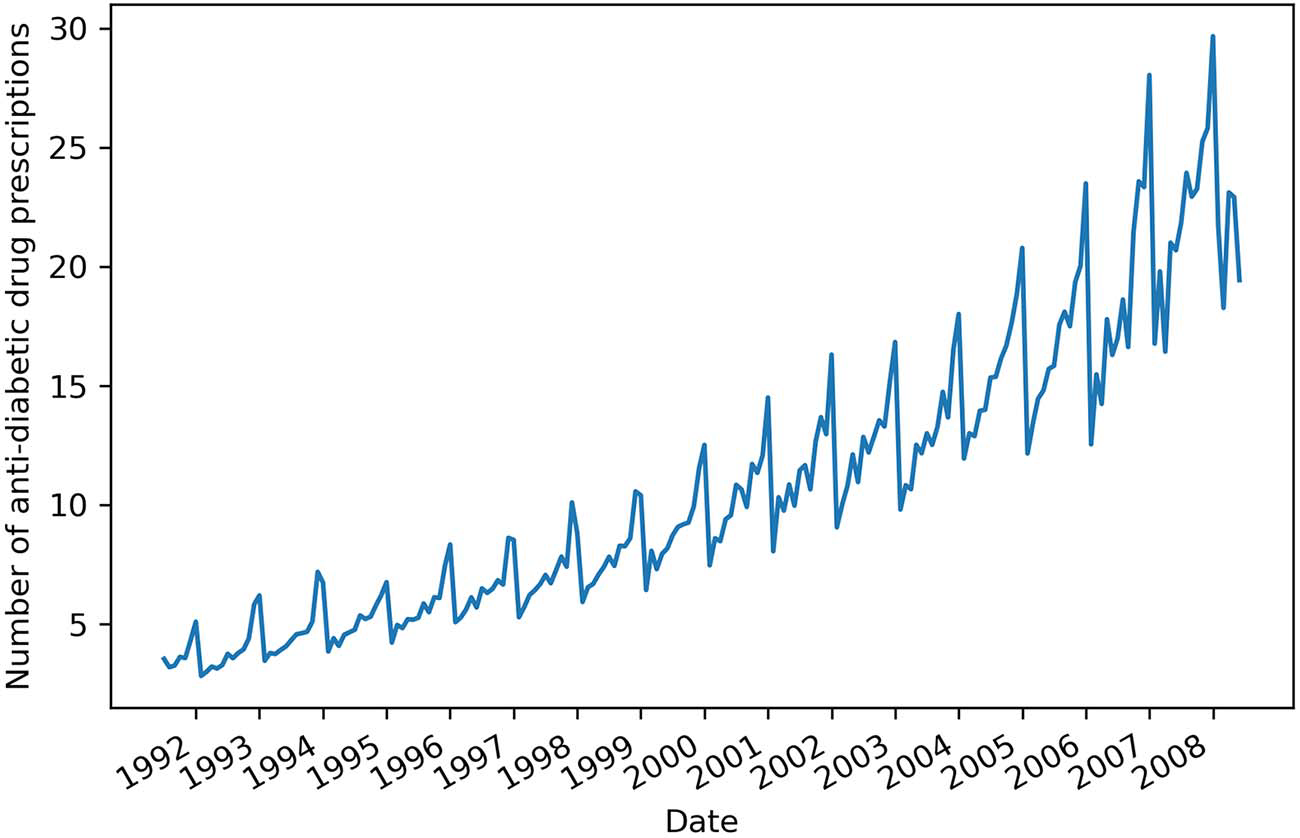

+ **Figura 11.1 Número mensual de prescripciones de medicamentos antidiabéticos en Australia entre 1991 y 2008.**

## **Pasos para hacer un buen Análisis de la Serie**

+ En la figura 11.1 verá una tendencia clara en la serie temporal, ya que el número de prescripciones aumenta con el tiempo.
+ Además, observará una marcada estacionalidad, ya que cada año parece comenzar con un valor bajo y terminar con un valor alto.
+ A esta altura, debería saber intuitivamente qué modelo es potencialmente el más adecuado para resolver este problema.
+ Para resolver este problema, consulte los siguientes pasos:
 + 1. *El objetivo es pronosticar 12 meses de prescripciones de medicamentos antidiabéticos*. **Utilice los últimos 36 meses del conjunto de datos como un conjunto de prueba para permitir pronósticos continuos**.
 + 2. Visualice la serie temporal.
 + 3. Utilice la descomposición de la serie temporal para extraer los componentes de tendencia y estacionalidad.
 + 4. Según su exploración, determine el modelo más adecuado.
 + 5. Modele la serie con los pasos habituales:
    + a. Aplique transformaciones para hacerla estacionaria
    + b. Establezca los valores de d y D. Establezca el valor de m.
    + c. Encuentre los parámetros óptimos (p,d,q)(P,D,Q)m.
    + d. ​​Realice un análisis residual para validar su modelo.
 + 6. Realice pronósticos continuos de 12 meses en el conjunto de prueba.
 + 7. Visualice sus pronósticos.
 + 8. Compare el rendimiento del modelo con una línea base. Seleccione una línea base y una métrica de error adecuadas.
 + 9. Concluya si el modelo se debe utilizar o no.
+ Para aprovechar al máximo este proyecto final, se le recomienda encarecidamente que lo complete por su cuenta consultando los pasos anteriores. Esto lo ayudará a evaluar su autonomía en el proceso de modelado y su comprensión.

# **11.1. Resolviendo el problema**.

#### **Paso 1. Las librerias de necesarias**
+ El primer paso natural es importar las bibliotecas que serán necesarias para completar el proyecto.
+ Luego podemos cargar los datos y almacenarlos en un DataFrame para usarlos durante todo el proyecto.
+ Por lo tanto, importaremos las siguientes bibliotecas y especificaremos la función mágica %matplotlib inline para mostrar los gráficos en el cuaderno:

In [ ]:
#### **Paso 1. Las librerias de necesarias**
import itertools

import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn.metrics

In [ ]:
# hacer que los graficos se vean bonitos
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [ ]:
# Ignorar advertencias innecesarias
import warnings
warnings.filterwarnings('ignore')

## **Paso 2. Importando los datos**
+ Una vez importadas las bibliotecas, podemos leer los datos y almacenarlos en un DataFrame.
+ También podemos mostrar la forma del DataFrame para determinar la cantidad de puntos de datos.

In [ ]:
## **Paso 2. Importando los datos**

df = pd.read_csv('/content/AusAntidiabeticDrug.csv')
df.head(10) # Muestra las primeras cinco filas de datos.


,ds,y
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869
5,1991-12-01,4.306371
6,1992-01-01,5.088335
7,1992-02-01,2.814520
8,1992-03-01,2.985811
9,1992-04-01,3.204780


In [ ]:
# Muestra el tamaño de mis datos.
print(len(df))

204


In [ ]:
# Muestra las ultimas 10 filas de datos.
df.tail(10)

,ds,y
194,2007-09-01,22.930357
195,2007-10-01,23.263340
196,2007-11-01,25.250030
197,2007-12-01,25.806090
198,2008-01-01,29.665356
199,2008-02-01,21.654285
200,2008-03-01,18.264945
201,2008-04-01,23.107677
202,2008-05-01,22.912510
203,2008-06-01,19.431740


### **Paso 3. Dibuje nuestra variable objetivode Pronostico**

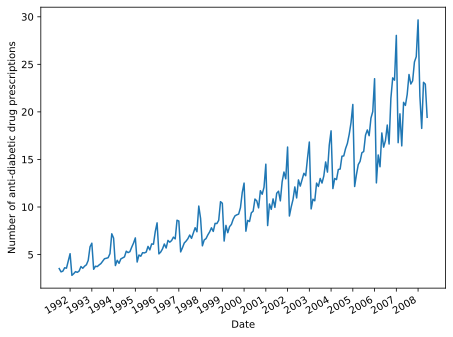

In [ ]:
fig, ax = plt.subplots()

ax.plot(df.y)
ax.set_xlabel('Date')
ax.set_ylabel('Number of anti-diabetic drug prescriptions')

plt.xticks(np.arange(6, 203, 12), np.arange(1992, 2009, 1))

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures', dpi=300)

#### **Paso 4. Si existe algun patron estacional construya un grafico donde se aprecie el patron**
+ A continuación podemos realizar la descomposición para visualizar los diferentes componentes de la serie temporal.
+ Recordemos que la descomposición de la serie temporal nos permite visualizar el componente tendencial, el componente estacional y los residuos.

In [ ]:
# el período es igual a la frecuencia
# STL significa descomposición de tendencia estacional utilizando LOESS.
decomposition = sm.tsa.STL(df.y, period = 12).fit()
# La columna y contiene el número de prescripciones mensuales de antidiabéticos.
# Además, el período se establece en 12, ya que tenemos datos mensuales.

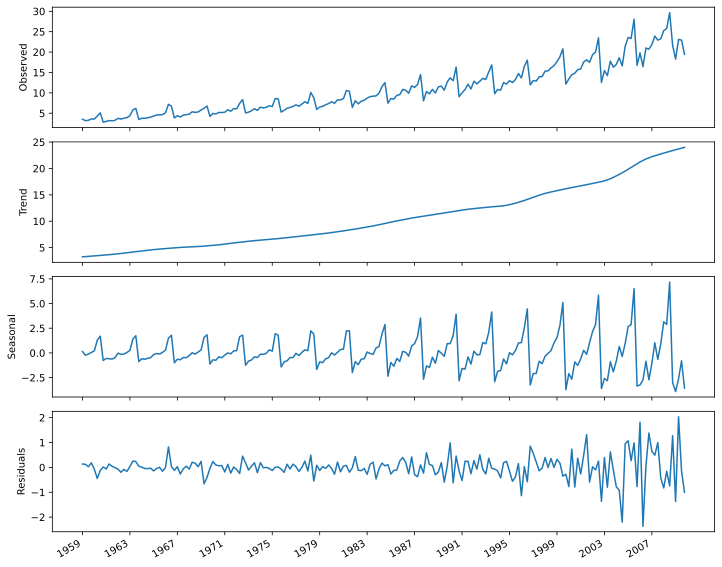

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(
    nrows = 4, ncols = 1,
    sharex = True,
    figsize=(10,8)
)

ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')
ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')
ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')
ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')

plt.xticks(np.arange(0, 208, 16), np.arange(1959, 2010, 4))


fig.autofmt_xdate()
plt.tight_layout()

plt.show()

+ **Figura 11.2 Descomposición de series temporales en el conjunto de datos de prescripciones de medicamentos antidiabéticos. El primer gráfico muestra los datos observados. El segundo gráfico muestra el componente de tendencia, que nos indica que el número de prescripciones de medicamentos antidiabéticos aumenta con el tiempo. El tercer gráfico muestra el componente estacional, donde podemos ver un patrón que se repite a lo largo del tiempo, lo que indica la presencia de estacionalidad. El último gráfico muestra los residuos, que son variaciones que no se explican por la tendencia del componente estacional.**


### **Acerca de la descomposición de la serie**
+ El resultado se muestra en la figura 11.2. Todo parece sugerir que un modelo $SARIMA(p,d,q)(P,D,Q)_m$ sería la solución óptima para pronosticar esta serie temporal.
+ Tenemos una tendencia y una estacionalidad clara.
+ **Además, no tenemos ninguna variable exógena con la que trabajar, por lo que no se puede aplicar el modelo SARIMAX.**
+ **Finalmente, deseamos predecir solo un objetivo, lo que significa que un modelo VAR tampoco es relevante en este caso.**

## **11.3 Modelado de los datos**
+ Hemos decidido que un modelo $SARIMA(p,d,q)(P,D,Q)_m$ es el más adecuado para modelar y pronosticar esta serie temporal.
+ Por lo tanto, seguiremos el procedimiento de modelado general para un modelo SARIMAX, ya que un modelo SARIMA es un caso especial del modelo SARIMAX.
+ El procedimiento de modelado se muestra en la figura 11.3.

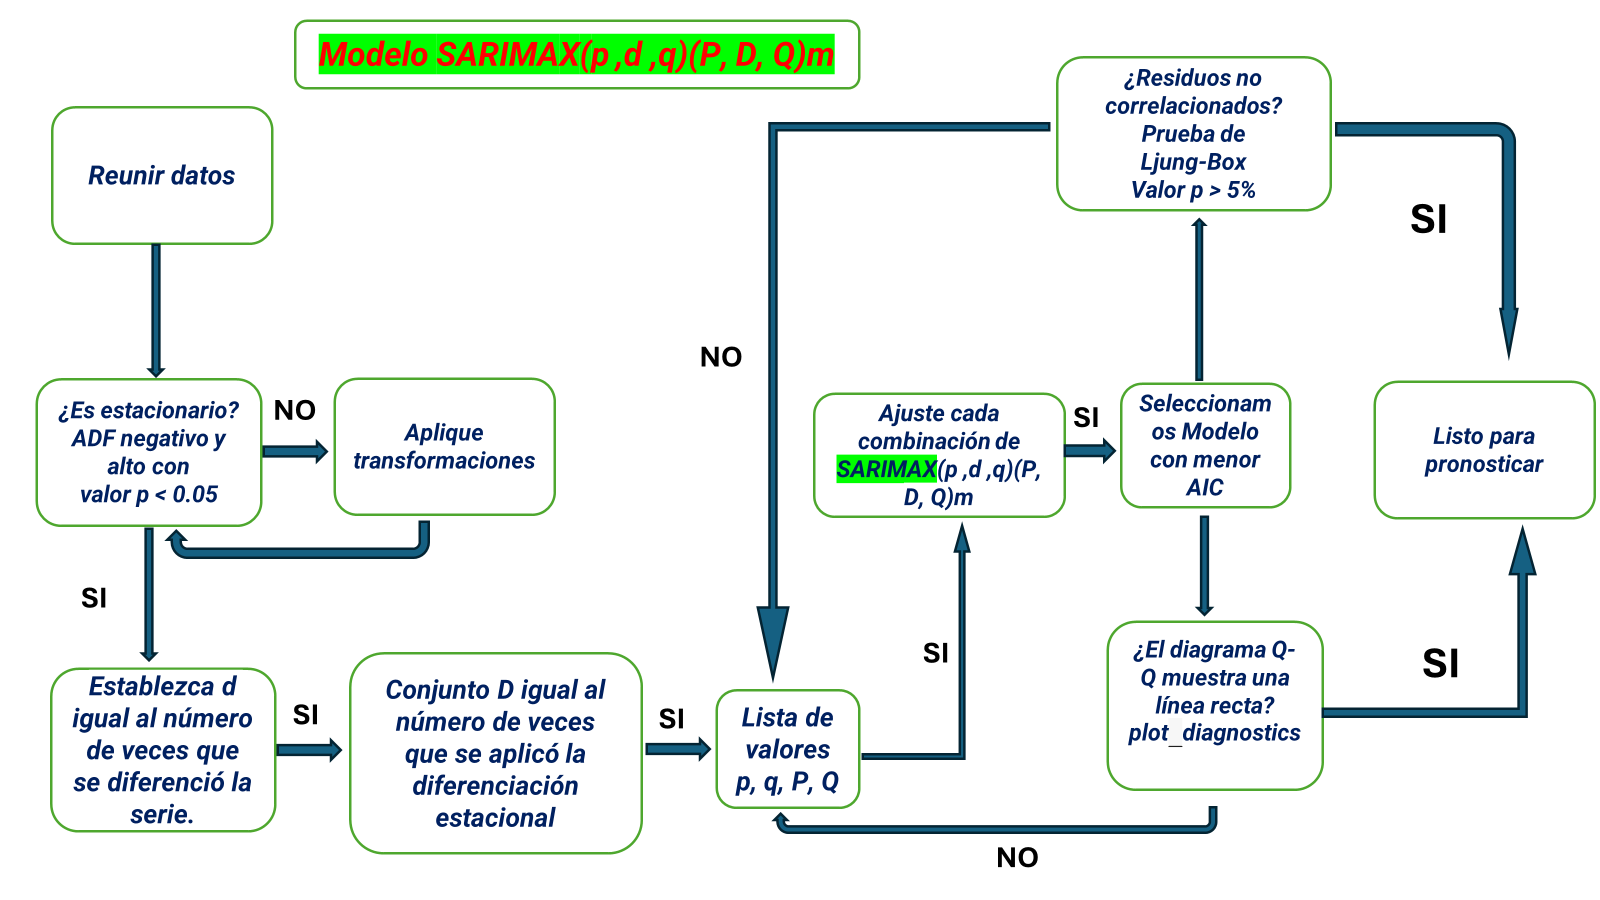

+ **Figura 11.3 Procedimiento de modelado SARIMA. Este procedimiento es el más general y se puede utilizar para un modelo SARIMA, ARIMA o ARMA, ya que son simplemente casos especiales del modelo SARIMAX.**

#### **Paso 5. Ejecute la prueba ADF y verifique si el proceso original es estacionario. Si no lo es, aplique la diferenciación.**
+ Siguiendo el procedimiento de modelado descrito en la figura 11.3, primero determinaremos si la serie es estacionaria utilizando la prueba Dickey-Fuller aumentada (ADF).

In [ ]:
df.head()

,ds,y
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


### **a. Prueba de estacionariedad - Dickey-Fuller aumentada (ADF)**

In [ ]:
### **a. Prueba de estacionariedad - Dickey-Fuller aumentada (ADF)**
from statsmodels.tsa.stattools import adfuller
ADF_result = adfuller(df.y)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')
print(f'¿Cuando se rechaza la Hipótesis Nula?')
print(f'Se rechaza si ocurren:')
print(f'ADF = {ADF_result[0]} es negativo y')
print(f'Si valor p ={round(ADF_result[1],4)} es menor a 0.05')

ADF Statistic: 3.145185689306745
p-value: 1.0
¿Cuando se rechaza la Hipótesis Nula?
Se rechaza si ocurren:
ADF = 3.145185689306745 es negativo y
Si valor p =1.0 es menor a 0.05


## **b. Conclusión Acerca del Paso 5**
+ Esto devuelve un valor p de 1,0, lo que significa que no podemos rechazar la hipótesis nula y concluimos que la serie no es estacionaria.
+ Por lo tanto, debemos aplicar transformaciones para que sea estacionaria.

#### **Paso 6. Ejecute la prueba ADF y verifique si el proceso diefenciado es estacionario. Si no lo es, aplique vuelva a diferenciar.**

#### **a. Diferenciación de primer orden $d=1$**

In [ ]:
### **Prueba de estacionariedad para la serie diferenciada**
### **Nuestra nueva serie a estudiar sera la diferenciada**
y_diff = np.diff(df.y, n = 1)

from statsmodels.tsa.stattools import adfuller
ADF_diff = adfuller(y_diff)

print(f'ADF Statistic: {ADF_diff[0]}')
print(f'p-value: {ADF_diff[1]}')
print(f'¿Cuando se rechaza la Hipótesis Nula?')
print(f'Se rechaza si ocurren:')
print(f'ADF = {ADF_diff[0]} es negativo y')
print(f'Si valor p ={round(ADF_diff[1],4)} es menor a 0.05')

ADF Statistic: -2.4951721474497903
p-value: 0.1166534168646754
¿Cuando se rechaza la Hipótesis Nula?
Se rechaza si ocurren:
ADF = -2.4951721474497903 es negativo y
Si valor p =0.1167 es menor a 0.05


#### **b. Diferenciación estacional de primer orden $D=1$**

In [ ]:
### **Prueba de estacionariedad para la serie diferenciada**
### **Nuestra nueva serie a estudiar sera la diferenciada**
y_diff_seasonal_diff = np.diff(y_diff, n = 12)

from statsmodels.tsa.stattools import adfuller
ADF_diff_seasonal = adfuller(y_diff_seasonal_diff)

print(f'ADF Statistic: {ADF_diff_seasonal[0]}')
print(f'p-value: {ADF_diff_seasonal[1]}')
print(f'¿Cuando se rechaza la Hipótesis Nula?')
print(f'Se rechaza si ocurren:')
print(f'ADF = {ADF_diff_seasonal[0]} es negativo y')
print(f'Si valor p ={round(ADF_diff_seasonal[1],4)} es menor a 0.05')

ADF Statistic: -19.84844009618371
p-value: 0.0
¿Cuando se rechaza la Hipótesis Nula?
Se rechaza si ocurren:
ADF = -19.84844009618371 es negativo y
Si valor p =0.0 es menor a 0.05


### **c. Conclusión Acerca del Paso 6 y los valores para $(d,D)$**
+ En la parte (a) el $Valor_p = 0.116$ para la serie diferenciada, por lo que se concluye que la serie no es estacionaria.
+ Apicamos una diferencia estacional, ya que notamos un fuerte patrón estacional en los datos.
+ Recordemos que tenemos datos mensuales, lo que significa que $m = 12$.
+ *Por lo tanto, una diferencia estacional resta valores que están separados por 12 pasos de tiempo.*
+ El valor p devuelto es 0,0. Por lo tanto, podemos rechazar la hipótesis nula y concluir que nuestra serie temporal es estacionaria.
+ Dado que diferenciamos la serie una vez y tomamos una diferencia estacional, $d = 1$ y $D = 1$.
+ Además, dado que tenemos datos mensuales, sabemos que $m = 12$.
+ Por lo tanto, sabemos que nuestro modelo final será un modelo $SARIMA(p,1,q)(P,1,Q)_{12}$.

## **11.3.1 Realización de la selección del modelo**
+ Hemos establecido que nuestro modelo será un modelo $SARIMA(p,1,q)(P,1,Q)_{12}$.
+ Ahora necesitamos encontrar los valores óptimos de p, q, P y Q.
+ Este es el paso de selección del modelo, en el que elegimos los parámetros que minimizan el criterio de información de Akaike (AIC).
+ Para ello, primero dividiremos los datos en conjuntos de prueba y de entrenamiento.
+ **Como se especifica en los pasos de la introducción del capítulo, el conjunto de prueba constará de los últimos 36 meses de datos.**

### **Paso 7. Conjunto de Prueba y de Entrenamiento**
+ Imprima la longitud del conjunto de pruebas para asegurarse de que contenga los últimos 36 meses.

In [ ]:
train = df.y[:168] # Conjunto de entrenamiento
test = df.y[168:] # Conjunto de Prueba

print(f'Longitud del conjunto de Datos es = {len(df)}')
print(f'Longitud del conjunto de Entrenamiento es = {len(train)}')
print(f'Longitud del conjunto de prueba es = {len(test)}')
print(f'Numero de años medidos es = {round(len(df)/12,0)}')

Longitud del conjunto de Datos es = 204
Longitud del conjunto de Entrenamiento es = 168
Longitud del conjunto de prueba es = 36
Numero de años medidos es = 17.0


In [ ]:
df.head() # recordemos cuales son nuestras variables

,ds,y
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [ ]:
df.tail() # recordemos cuales son nuestras variables

,ds,y
199,2008-02-01,21.654285
200,2008-03-01,18.264945
201,2008-04-01,23.107677
202,2008-05-01,22.912510
203,2008-06-01,19.431740


### **Paso 8. Dibujando la Región de Prueba y de Entrenamiento del modelo escogido**

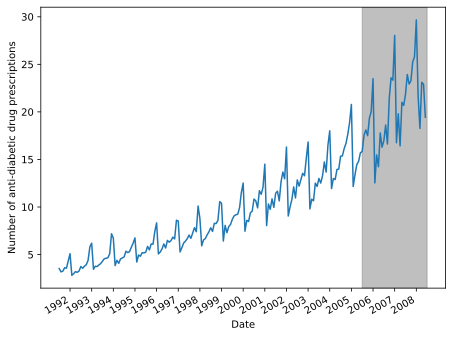

In [ ]:
fig, ax = plt.subplots()

ax.plot(df.y)
ax.set_xlabel('Date')
ax.set_ylabel('Number of anti-diabetic drug prescriptions')
ax.axvspan(168, 204, color='#808080', alpha=0.5)

plt.xticks(np.arange(6, 203, 12), np.arange(1992, 2009, 1))

fig.autofmt_xdate()
plt.tight_layout()

### **Paso 9. El Modelo que nos permitira encontrar los parametros del modelos SARIMA y calcular el AIC**
+ Una vez realizada la división, podemos utilizar la función `optimizar_SARIMAX` para encontrar los valores de p, q, P y Q que minimizan el AIC.
+ Tenga en cuenta que podemos utilizar optimizar_SARIMAX aquí porque SARIMA es un caso especial del modelo SARIMAX más general.
+ La función se muestra en la siguiente lista.

In [ ]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimize_SARIMAX(endog: Union[pd.Series, list], exog: Union[pd.Series, list], order_list: list, d: int, D: int, s: int) -> pd.DataFrame:

    results = []

    for order in tqdm_notebook(order_list):
        try:
            model = SARIMAX(
                endog,
                exog,
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue

        aic = model.aic
        results.append([order, model.aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']

    # Ordenar en orden ascendente, cuanto menor sea el AIC, mejor.
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

### **Paso 10. Implementando SARIMAX - Ajustamos todos los modelos SARIMAX y calculamos el AIC**
+ Una vez definida la función, podemos decidir el rango de valores que vamos a probar para p, q, P y Q.
+ Luego, generaremos una lista de combinaciones únicas de parámetros.
+ Siéntete libre de probar un rango de valores diferente al que he usado aquí.
+ **Simplemente ten en cuenta que cuanto mayor sea el rango, más tiempo llevará ejecutar la función optimized_SARIMAX.**

### **a. Creamos la lista de todos los parametros (p,d,q)(P,D,Q) y m=s**

In [ ]:
### **a. Creamos la lista de todos los parametros (p,d,q)(P,D,Q) y m=s**
# Crea una lista para nuestros posibles valores de p y q.
ps = range(0, 4) # Permita que p y q varíen de 0 a 12 para capturar
#información estacional.
qs = range(0, 4)
Ps = range(0, 4)
Qs = range(0, 4)
d = 1
D = 1
s = 12 # dado que los datos se recopilan mensualmente m = s = 12

### **b. lista con todas las combinaciones posibles para p,q,P,Q**

In [ ]:
### **b. lista con todas las combinaciones posibles para p,q,P,Q**
order_list = list(product(ps, qs, Ps, Qs))

### **c. Obteniendo los modelos SARIMAX y el AIC**

In [ ]:
### **c. Obteniendo los modelos SARIMAX y el AIC**
SARIMA_result_df = optimize_SARIMAX(train, None, order_list, d, D, s)
SARIMA_result_df

  0%|          | 0/256 [00:00<?, ?it/s]

,"(p,q,P,Q)",AIC
0,"(1, 0, 2, 3)",26.618683
1,"(3, 1, 1, 3)",270.951096
2,"(3, 3, 1, 3)",271.466318
3,"(3, 2, 1, 3)",272.222636
4,"(3, 3, 0, 1)",272.580413
...,...,...
251,"(0, 0, 3, 1)",351.425175
252,"(0, 0, 1, 1)",351.466837
253,"(0, 0, 0, 1)",354.751719
254,"(0, 0, 1, 0)",357.173706


#### **f. Evaluamos todos los modelos $SARIMA(p,d,q)(P,D,Q)_m$ con el AIC**

+ Una vez terminada la función, el resultado muestra que el AIC mínimo se consigue con p = 2, q = 3, P = 1 y Q = 3.
+ Por tanto, el modelo óptimo es un modelo $SARIMA(2,1,3)(1,1,3)_{12}$
..

## **Paso 11. Análisis de los Residuos para el modelo resultante- método plot_diagnostics**.

+ Ahora que tenemos el modelo óptimo, debemos analizar sus residuos para determinar si el modelo se puede utilizar o no.
+ Esto dependerá de los residuos, que deben comportarse como ruido blanco.
+ Si ese es el caso, el modelo se puede utilizar para realizar pronósticos.
+ Podemos ajustar el modelo y utilizar el método plot_diagnostics para analizar cualitativamente sus residuos.

In [ ]:
SARIMA_model = SARIMAX(train, order=(2,1,3), seasonal_order=(1,1,3,12), simple_differencing=False)
SARIMA_model_fit = SARIMA_model.fit(disp=False)

print(SARIMA_model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  168
Model:             SARIMAX(2, 1, 3)x(1, 1, 3, 12)   Log Likelihood                -128.117
Date:                            Fri, 28 Jun 2024   AIC                            276.234
Time:                                    19:57:45   BIC                            306.668
Sample:                                         0   HQIC                           288.596
                                            - 168                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1312      0.055    -20.725      0.000      -1.238      -1.024
ar.L2         -0.9658      0.064   

### **Paso 12. Análisis gráfico de los Residuos para el modelo $SARIMA(2,1,3)(1,1,3)_{12}$ - método plot_diagnostics**.

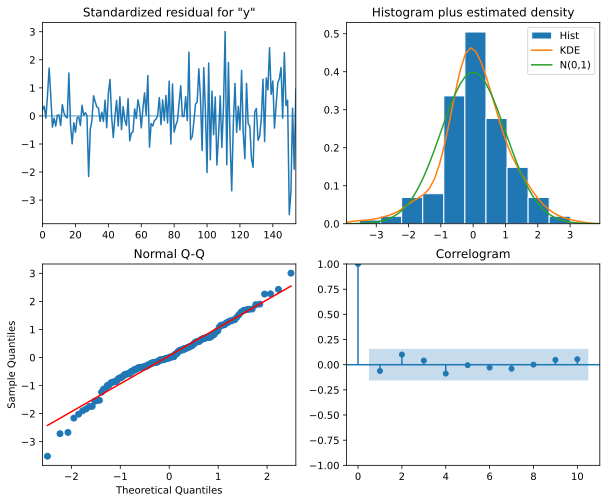

In [ ]:
SARIMA_model_fit.plot_diagnostics(figsize=(10,8));

plt.savefig('figures', dpi=300)

#### **Análisis de residuos del modelo seleccionado**
+ **Figura 11.4 Diagnóstico visual de los residuos. En el gráfico superior izquierdo, los residuos no tienen tendencia a lo largo del tiempo y la varianza parece constante. En la parte superior derecha, la distribución de los residuos es muy cercana a una distribución normal. Esto se ve respaldado por el gráfico Q-Q en la parte inferior izquierda, que muestra una línea bastante recta que se encuentra en y = x. Por último, el correlograma en la parte inferior derecha no muestra coeficientes significativos después del retardo 0, al igual que el ruido blanco.**

### **Paso 13. Prueba de independencia de los residuos- prueba de Ljung-Box**
+ Nuestro último paso es ejecutar la prueba de **Ljung-Box** para determinar si los residuos están correlacionados.
+ Si los valores p devueltos superan 0,05, no podemos rechazar la hipótesis nula, lo que significa que nuestros residuos no están correlacionados y se distribuyen de forma independiente, al igual que el ruido blanco.
+ Aplicaremos la prueba en los primeros 10 rezagos y estudiaremos los valores p. Si todos los valores p son mayores que.

In [ ]:
### **Prueba de Ljung - Box para los residuos con el modelo $SARIMA(2,1,3)(1,1,3)_{12}$
residuals = SARIMA_model_fit.resid
sm.stats.acorr_ljungbox(residuals, lags = range(1, 11))

,lb_stat,lb_pvalue
1,1.429821,0.231794
2,1.693226,0.428865
3,2.261734,0.519891
4,3.799796,0.433778
5,4.342787,0.501189
6,4.359562,0.628140
7,9.163331,0.241141
8,9.226161,0.323578
9,9.408899,0.400417
10,9.408904,0.493786


#### **Análisis de la prueba Prueba de Ljung-Box**
+ **Los valores p devueltos son todos mayores que 0,05, por lo que rechazamos la hipótesis nula y concluimos que los residuos no están correlacionados**

### **Paso 14. Función de pronóstico para el modelo $SARIMA(2,1,3)(1,1,3)_{12}$**
## **11.4. Pronóstico y evaluación del rendimiento del modelo**

+ Tenemos un modelo que se puede utilizar para realizar pronósticos, por lo que ahora realizaremos pronósticos continuos de 12 meses sobre el conjunto de prueba de 36 meses.
+ De esa manera, tendremos una mejor evaluación del rendimiento de nuestro modelo, ya que las pruebas en menos puntos de datos podrían generar resultados sesgados.
+ Utilizaremos el pronóstico estacional ingenuo como línea de base; simplemente tomará los últimos 12 meses de datos y los utilizará como pronósticos para los próximos 12 meses.
+ Primero definiremos la función `rolling_forecast` para generar las predicciones sobre todo el conjunto de prueba con una ventana de 12 meses.

In [ ]:
def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:
    # la longitud del tren + el horizonte forman la longitud total del conjunto de datos
# lo que significa que también incluye la predicción
    total_len = train_len + horizon
    end_idx = train_len

    if method == 'last_season':
        pred_last_season = []

        for i in range(train_len, total_len, window):
            last_season = df['y'][i-window:i].values
            pred_last_season.extend(last_season)

        return pred_last_season

    elif method == 'SARIMA':
        pred_SARIMA = []

        for i in range(train_len, total_len, window):
            model = SARIMAX(df['y'][:i], order=(2,1,3), seasonal_order=(1,1,3,12), simple_differencing=False)
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_SARIMA.extend(oos_pred)

        return pred_SARIMA

### **Paso 15. DataFrame para almacenar las predicciones y los valores reales**
+ A continuación, crearemos un DataFrame para almacenar las predicciones y los valores reales.
+ Se trata simplemente de una copia del conjunto de prueba.

In [ ]:
# **Paso 15. DataFrame para almacenar las predicciones y los valores reales**
pred_df = df[168:]
pred_df.head()


,ds,y
168,2005-07-01,15.829550
169,2005-08-01,17.554701
170,2005-09-01,18.100864
171,2005-10-01,17.496668
172,2005-11-01,19.347265


In [ ]:
print(f'El DataFrame que guardara mis predicciones y valores reales')
print(f'Tiene tamaño {len(pred_df)}')

El DataFrame que guardara mis predicciones y valores reales
Tiene tamaño 36


### **Paso 16. Definir los parámetros que se utilizarán para la función de pronostico - rolling_forecast**
+ Ahora podemos definir los parámetros que se utilizarán para la función rolling_forecast.
+ El conjunto de datos contiene **204 filas** y el conjunto de prueba contiene **36 puntos de datos**, lo que significa que la longitud del conjunto de **entrenamiento es 204 – 36 = 168**.
+ El horizonte es **36**, ya que nuestro conjunto de prueba contiene 36 meses de datos.
+ Finalmente, la **ventana es de 12 meses**, ya que estamos pronosticando 12 meses a la vez.
+ Con esos valores establecidos, podemos registrar las predicciones provenientes de **nuestra línea base, que es un pronóstico estacional ingenuo.**
+ **Simplemente toma los últimos 12 meses de datos observados y los usa como pronósticos para los próximos 12 meses.**

In [ ]:
# **Paso 16. Definir los parámetros que se utilizarán para la función de pronostico - rolling_forecast**
TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 12

print(f'TRAIN_LEN = {TRAIN_LEN}')
print(f'HORIZON = {HORIZON}')
print(f'WINDOW = {WINDOW}')

TRAIN_LEN = 168
HORIZON = 36
WINDOW = 12


### **Paso 17. Realizamos los dos pronosticos - Metodo  ingenuo y SARIMA y lo agregamos a nuestro DataFrame creado**

+ **last_season o baseline (naive seasonal forecast)**, que es un pronóstico estacional ingenuo.**

### **a. Usando last_season**

In [ ]:
### **a. Usando last_season**
pred_df['last_season'] = rolling_forecast(df, TRAIN_LEN, HORIZON, WINDOW, 'last_season')

pred_df.head()

,ds,y,last_season
168,2005-07-01,15.829550,15.339097
169,2005-08-01,17.554701,15.370764
170,2005-09-01,18.100864,16.142005
171,2005-10-01,17.496668,16.685754
172,2005-11-01,19.347265,17.636728


### **b. Usando SARIMA**

In [ ]:
### **b. Usando SARIMA**
pred_df['SARIMA'] = rolling_forecast(df, TRAIN_LEN, HORIZON, WINDOW, 'SARIMA')

pred_df.head()

,ds,y,last_season,SARIMA
168,2005-07-01,15.829550,15.339097,16.749386
169,2005-08-01,17.554701,15.370764,16.684883
170,2005-09-01,18.100864,16.142005,17.188720
171,2005-10-01,17.496668,16.685754,18.088932
172,2005-11-01,19.347265,17.636728,18.657838


## **Paso 18. Construya los graficos de predicción para los dos métodoss: Ingenuo y SARIMA para la serie estudiada**

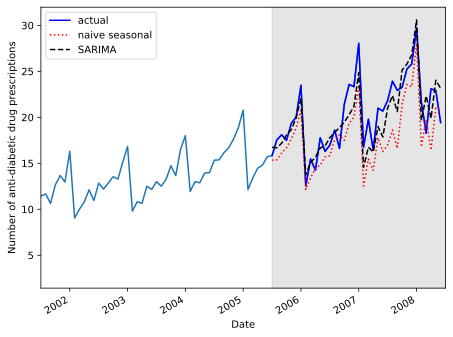

In [ ]:
fig, ax = plt.subplots()

ax.plot(df.y)
ax.plot(pred_df.y, 'b-', label='actual')
ax.plot(pred_df.last_season, 'r:', label='naive seasonal')
ax.plot(pred_df.SARIMA, 'k--', label='SARIMA')
ax.set_xlabel('Date')
ax.set_ylabel('Number of anti-diabetic drug prescriptions')
ax.axvspan(168, 204, color='#808080', alpha=0.2)

ax.legend(loc=2)

plt.xticks(np.arange(6, 203, 12), np.arange(1992, 2009, 1))
plt.xlim(120, 204)

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures', dpi=300)

+ **Figura 11.5 Pronósticos del número de prescripciones de medicamentos antidiabéticos en Australia. Las predicciones del modelo de referencia se muestran como una línea de puntos, mientras que las predicciones del modelo SARIMA se muestran como una línea discontinua.**
+ En la figura 11.5 se puede ver que las predicciones del modelo SARIMA (línea discontinua) se ajustan más a los valores reales que las predicciones estacionales ingenuas (línea de puntos).
+ Por lo tanto, podemos esperar intuitivamente que el modelo SARIMA haya tenido un mejor rendimiento que el método de referencia.

### **Paso 19. Obtenga el Error absoluto medio (MAE) y el MAPE e interpretelo**
+ Para evaluar el rendimiento cuantitativamente, utilizaremos el error porcentual absoluto medio (MAPE).
+ El MAPE es fácil de interpretar, ya que devuelve un error porcentual.

### **a. Función para calcular el Error Porcentual Medio - MAPE**

In [ ]:
### **a. Función para calcular el Error Porcentual Medio - MAPE**
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### **b. Calculando el Error Porcentual Medio - MAPE**

In [ ]:
### **b. Calculando el Error Porcentual Medio - MAPE**
mape_naive_seasonal = mape(pred_df.y, pred_df.last_season)
mape_SARIMA = mape(pred_df.y, pred_df.SARIMA)

print(f'MAPE con método ingenuo = {round(mape_naive_seasonal,1)}%')
print(f'MAPE con SARIMA = {round(mape_SARIMA,1)}%')

MAPE con método ingenuo = 12.7%
MAPE con SARIMA = 7.9%


### **c. Dibuje sus MAPE en un gráfico de barras.**

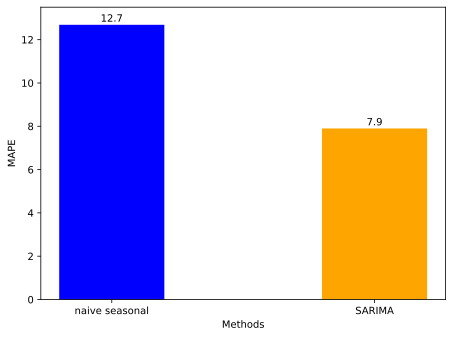

In [ ]:
## **c. Dibuje sus MAPE en un gráfico de barras.**
import matplotlib.pyplot as plt

# Datos
x = ['naive seasonal', 'SARIMA']
y = [mape_naive_seasonal, mape_SARIMA]

# Colores para las barras (puedes modificar esta lista según tus preferencias)
colors = ['blue',  'orange']

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Graficar las barras con colores específicos
bars = ax.bar(x, y, width=0.4, color=colors)

# Etiquetas y límites del eje y
ax.set_xlabel('Methods')
ax.set_ylabel('MAPE')
ax.set_ylim(0, 13.5)

# Añadir texto con los valores encima de cada barra
for bar, value in zip(bars, y):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 0.05,
             round(value, 1),
             ha='center', va='bottom')

# Ajustar el diseño y guardar la figura
plt.tight_layout()
plt.savefig('figures.png', dpi=300)
plt.show()


+ **Figura 11.6 El MAPE para el pronóstico estacional ingenuo y el modelo SARIMA. Dado que el MAPE del modelo SARIMA es menor que el MAPE de la línea base, podemos concluir que el modelo SARIMA debería utilizarse para pronosticar el número de prescripciones de medicamentos antidiabéticos.**.

+ **Dado que el modelo SARIMA logra el MAPE más bajo, podemos concluir que el modelo SARIMA(2,1,3)(1,1,3)12 se debe utilizar para pronosticar la cantidad mensual de prescripciones de medicamentos antidiabéticos en Australia.**

### **Próximos pasos**
+ Felicitaciones por completar este proyecto final.
+ Espero que haya podido completarlo por su cuenta y que ahora se sienta seguro de sus habilidades y conocimientos sobre la previsión de series temporales mediante modelos estadísticos.
+ Por supuesto, la práctica hace al maestro, por lo que lo aliento a que busque otros conjuntos de datos de series temporales y practique el modelado y la previsión de los mismos.
+ Esto lo ayudará a desarrollar su intuición y perfeccionar sus habilidades.
+ En el próximo capítulo, comenzaremos una nueva sección en la que utilizaremos modelos de aprendizaje profundo para modelar y pronosticar series temporales complejas con alta dimensionalidad.